# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [3]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file= "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import pandas as pd

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(pd.read_csv("signnames.csv"))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of unique classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of unique classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Number of this sign: 1260


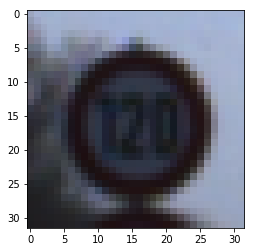

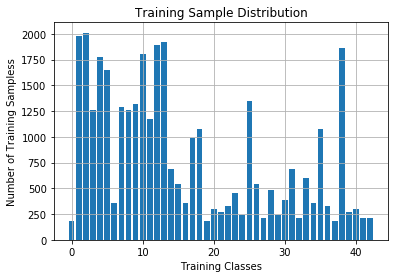

In [6]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import collections
import numpy as np
%matplotlib inline
# Visualizations will be shown in the notebook.

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
lab = collections.Counter(y_train)

plt.imshow(image, cmap="gray")
print("Number of this sign: {}".format(lab[y_train[index]]))

# Show the histogram of the data set
def plot_examples_per_class(labels_):
    values, counts = np.unique(labels_, return_counts=True)
    plt.figure()
    plt.bar(values, counts)
    plt.ylabel('Number of Training Sampless')
    plt.xlabel('Training Classes')
    plt.title('Training Sample Distribution')
    plt.grid(True)
    
plot_examples_per_class(y_train)

### Data Augmentation

Data augmentation can help us generate additional training examples. These samples are generated by image transformation. However, this process takes a long time for my computer and the jupyter notebook crashes everytime after running this process. Therefore, I choose not to include this code at the first submission.

### Image transformation function

def transform_image(image,ang_range,shear_range,trans_range):

    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = image.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)

    image = cv2.warpAffine(image,Rot_M,(cols,rows))
    image = cv2.warpAffine(image,Trans_M,(cols,rows))
    image = cv2.warpAffine(image,shear_M,(cols,rows))

    return image

### Show an example for image transformation

image = X_train[1200,:,:,:]
image = transform_image(image,20,10,5)
plt.imshow(image)

### Run image transformation with the dataset

values, counts = np.unique(y_train, return_counts=True)
max_counts = counts.max()

for class_ in values:
    print('working on class #', class_, '...')
    num_img_needed = max_counts-counts[class_]
    
    first_example_index = next(index for index, val in enumerate(y_train) if val==class_)
    first_example = X_train[first_example_index]
    
    class_ = class_.reshape([1])
    
    for num in range(0,num_img_needed):
        transformed_example = transform_image(first_example,20,10,5)
        transformed_example = transformed_example.reshape([1, 32, 32, 3])
        X_train = np.concatenate([X_train, transformed_example])
        y_train = np.concatenate([y_train, class_])


plot_examples_per_class(y_train)

### Save the data for easy access
import os

pickle_file = 'transformed_data.pickle'
if not os.path.isfile(pickle_file):
    print('Saving data to pickle file...')
    try:
        with open('transformed_data.pickle', 'wb') as pfile:
            pickle.dump(
                {
                    'X_train': X_train,
                    'y_train': y_train,
                },
                pfile, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

print('Data cached in pickle file.')

### Reload the data
pickle_file = 'transformed_data.pickle'
with open(pickle_file, 'rb') as f:
    pickle_data = pickle.load(f)
    X_train = pickle_data['X_train']
    y_train = pickle_data['y_train']
    del pickle_data  # Free up memory

print('Data and modules loaded.')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2
import numpy as np

def rgb2gray(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

def normalize(dataset):
    return dataset / 255 * 0.8 + 0.1

def preprocessing(dataset):
    gray_set = []
    for image in dataset:
        gray = rgb2gray(image)
        gray_set.append(gray)
    return np.array(gray_set)

X_train = preprocessing(X_train)
X_train = X_train[...,np.newaxis]
X_train = normalize(X_train)

X_valid = preprocessing(X_valid)
X_valid = X_valid[...,np.newaxis]
X_valid = normalize(X_valid)

X_test = preprocessing(X_test)
X_test = X_test[...,np.newaxis]
X_test = normalize(X_test)

print("Success: Data has been preprocessed")

Success: Data has been preprocessed


Preprocessing the dataset

Image before and after preprocessing...


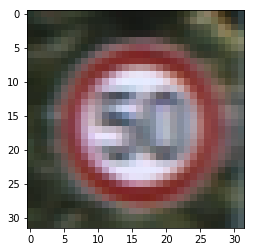

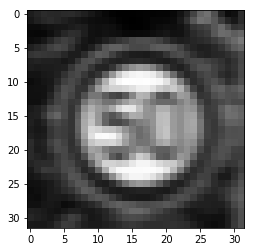

In [5]:
print("Image before and after preprocessing...")
plt.imshow(image, cmap = 'gray')

image_processed = X_train[index]
image_processed = image_processed.squeeze()
plt.figure(2)
plt.imshow(image_processed, cmap = 'gray')



### Model Architecture

In [6]:
import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 120

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

mu = 0
sigma = 0.1

weights = {
    'wc1':tf.Variable(tf.truncated_normal(shape = (5,5,1,6), mean = mu, stddev = sigma)),
    'wc2':tf.Variable(tf.truncated_normal(shape = (5,5,6,16), mean = mu, stddev = sigma)),
    'wd1':tf.Variable(tf.truncated_normal(shape = (400,120), mean = mu, stddev = sigma)),
    'wd2':tf.Variable(tf.truncated_normal(shape = (120,84), mean = mu, stddev = sigma)),
    'out':tf.Variable(tf.truncated_normal(shape = (84,43), mean = mu, stddev = sigma))
}

biases = {
    'bc1':tf.Variable(tf.zeros(6)),
    'bc2':tf.Variable(tf.zeros(16)),
    'bd1':tf.Variable(tf.zeros(120)),
    'bd2':tf.Variable(tf.zeros(84)),
    'out':tf.Variable(tf.zeros(43))
}
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides = [1,strides,strides,1], padding = 'VALID')
    x = x + b
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(
    x,
    ksize=[1,k,k,1],
    strides=[1,k,k,1],
    padding='VALID')

def LeNet(x,dropout):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    conv1 = tf.nn.dropout(conv1,dropout)
    conv1 = maxpool2d(conv1, k=2)
    
    conv2 = conv2d(conv1,weights['wc2'], biases['bc2'])
    conv2 = tf.nn.dropout(conv2,dropout)
    conv2 = maxpool2d(conv2, k=2)
    
    fc1 = flatten(conv2)
    fc1 = tf.matmul(fc1, weights['wd1']) + biases['bd1']
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1,dropout)
    
    fc2 = tf.matmul(fc1, weights['wd2']) + biases['bd2']
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2,dropout)
    
    logits = tf.matmul(fc2, weights['out']) + biases['out']
    
    return logits

In [8]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [9]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

rate = 0.001

logits = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [10]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [11]:
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.75})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.604

EPOCH 2 ...
Validation Accuracy = 0.785

EPOCH 3 ...
Validation Accuracy = 0.837

EPOCH 4 ...
Validation Accuracy = 0.863

EPOCH 5 ...
Validation Accuracy = 0.878

EPOCH 6 ...
Validation Accuracy = 0.895

EPOCH 7 ...
Validation Accuracy = 0.906

EPOCH 8 ...
Validation Accuracy = 0.905

EPOCH 9 ...
Validation Accuracy = 0.915

EPOCH 10 ...
Validation Accuracy = 0.908

EPOCH 11 ...
Validation Accuracy = 0.920

EPOCH 12 ...
Validation Accuracy = 0.920

EPOCH 13 ...
Validation Accuracy = 0.921

EPOCH 14 ...
Validation Accuracy = 0.927

EPOCH 15 ...
Validation Accuracy = 0.932

EPOCH 16 ...
Validation Accuracy = 0.935

EPOCH 17 ...
Validation Accuracy = 0.940

EPOCH 18 ...
Validation Accuracy = 0.938

EPOCH 19 ...
Validation Accuracy = 0.939

EPOCH 20 ...
Validation Accuracy = 0.941

EPOCH 21 ...
Validation Accuracy = 0.945

EPOCH 22 ...
Validation Accuracy = 0.946

EPOCH 23 ...
Validation Accuracy = 0.945

EPOCH 24 ...
Validation Accura

In [18]:
with tf.Session() as sess:
    saver.restore(sess, "./lenet")

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
    train_accuracy = evaluate(X_train, y_train)
    print("Training Accuracy = {:.3f}".format(train_accuracy))
    
    valid_accuracy = evaluate(X_valid, y_valid)
    print("Validation Accuracy = {:.3f}".format(valid_accuracy))

Test Accuracy = 0.930
Training Accuracy = 0.997
Validation Accuracy = 0.951


### Architecture choosing approach
First I applied the CNN architecture the same as in the LeNet-Lab section. I changed the output classes to be 43 and remained the others the same. I then added dropout to prevent overfitting in the model. The validation accuracy is still low and then I increased the epoch number to 50.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

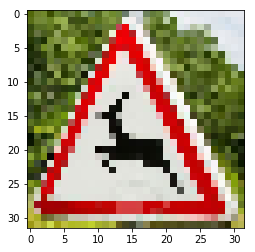

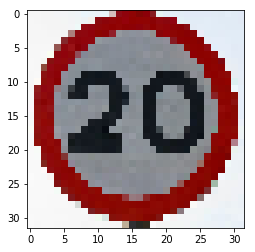

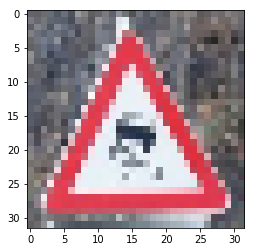

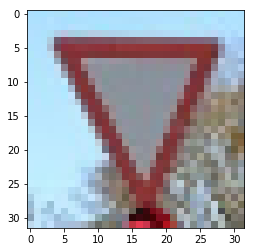

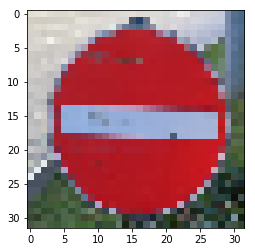

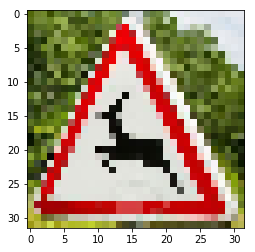

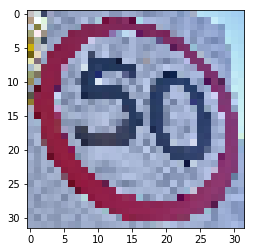

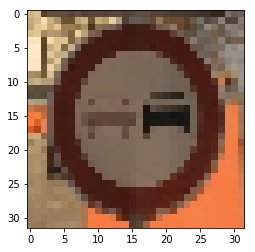

(8, 32, 32, 1)


In [13]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import matplotlib.image as mimg
files = os.listdir("Test/")
test_img = []
img_index = []
for file in files:
    img = mimg.imread("Test/"+file)
    img = cv2.resize(img,(32,32))
    test_img.append(img)
    plt.imshow(img)
    plt.show()
    img_index.append(int(os.path.splitext(file)[0]))

import numpy as np
test_img = np.array(test_img)
test_img = preprocessing(test_img)
test_img = test_img[...,np.newaxis]
test_img = normalize(test_img)
print(test_img.shape)

### Predict the Sign Type for Each Image

In [14]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, "./lenet")
    classification = sess.run(logits, feed_dict={x: test_img, keep_prob: 1.})
    
    pred_val = tf.argmax(logits, 1)
    soln_vals = sess.run(pred_val, feed_dict={x: test_img, keep_prob: 1.})

for i in range(len(soln_vals)):
    print("No.{} image:".format(i))
    print('predicted_vals:', soln_vals[i])
    print('actual_vals:', img_index[i])
    print()

No.0 image:
predicted_vals: 31
actual_vals: 31

No.1 image:
predicted_vals: 10
actual_vals: 0

No.2 image:
predicted_vals: 23
actual_vals: 23

No.3 image:
predicted_vals: 13
actual_vals: 13

No.4 image:
predicted_vals: 17
actual_vals: 17

No.5 image:
predicted_vals: 31
actual_vals: 19

No.6 image:
predicted_vals: 40
actual_vals: 2

No.7 image:
predicted_vals: 9
actual_vals: 9



### Analyze Performance

In [15]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
correct_pred = 0
for i in range(len(soln_vals)):
    if int(img_index[i]) == int(soln_vals[i]):
        correct_pred = correct_pred + 1

Accuracy = correct_pred / len(soln_vals) * 100
print("the accuracy is: {}%".format(Accuracy))

the accuracy is: 62.5%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [16]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    predicts = sess.run(tf.nn.top_k(classification, k=5, sorted=True))

data_pd = pd.read_csv('signnames.csv')
    
for i in range(len(predicts[0])):
    print('Image', i, 'probabilities:', predicts[0][i], '\n and predicted classes:', predicts[1][i])

Image 0 probabilities: [ 13.78189945   6.19696522   4.47181034   0.88106287   0.36997271] 
 and predicted classes: [31 21 23 30 11]
Image 1 probabilities: [ 2.74208593  1.40089405  0.69817418 -0.33563235 -1.3726176 ] 
 and predicted classes: [10 35  5 40 12]
Image 2 probabilities: [ 13.28581905  11.55496788  10.72077274  10.67767906  10.38736439] 
 and predicted classes: [23 30 20 24 11]
Image 3 probabilities: [ 37.20843887   4.64946461   2.89287663  -0.23825577  -1.34622538] 
 and predicted classes: [13 35 12 25 33]
Image 4 probabilities: [ 31.13739967   2.67059422   0.48177987  -1.46604931  -3.72396302] 
 and predicted classes: [17 34 14 30  6]
Image 5 probabilities: [ 13.78189945   6.19696522   4.47181034   0.88106287   0.36997271] 
 and predicted classes: [31 21 23 30 11]
Image 6 probabilities: [ 2.72071099  1.17531407  0.51142818  0.38674527 -0.15943579] 
 and predicted classes: [40  0  1 28 16]
Image 7 probabilities: [ 10.03363037   3.27694821   1.4710623   -0.70444858  -1.421105

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Question 2
*Describe how, and identify where in your code, you set up training, validation and testing data. How much data was in each set? Explain what techniques were used to split the data into these sets.*

**Answer:**
The training, validation and test data sets are directly imported from the *traffic-sign-data.zip* without any data splitting techiques. The size of each set is shown as below:

In [7]:
print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples


### Question 3
*Describe, and identify where in your code, what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.) Consider including a diagram and/or table describing the final model.*

**Answer:**
### CNN architecture
Input: 32X32X3 RGB picture

Convoluation1: 5X5 with 1X1 stride, valid padding, outputs:28X28X6

Dropout: 0.75

Max pooling: 2X2 stride, outputs:14X14X6

Convoluation2: 5X5 with 1X1 stride, valid padding, outputs:10X10X16

Dropout: 0.75

Max pooling: 2X2 stride, outputs:5X5X16

Fully connected1: 120 nerous
Dropout: 0.75

Fully connected2: 84 nerous
Dropout: 0.75

Softmax: 43 outputs

### Question 4
*Describe how, and identify where in your code, you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.*

**Answer:**
Weights used in the convolution layers were initialized by a truncated normal distribution with mu=0, sigma=0.1. Bias weights were initilized by zeros. Weights in the fully connected layers were initialized by truncaed normal distribution with mu=0, sigma=0.1.

The model was trained using batch sets of 120 with 50 epoches, these are determined by trail and error.

A reduced mean, cross entropy loss function was fed the logits from the last fully connected layer. This loss was then minimized using the Adam optimizer with an initial learning rate of 0.001.

Dropout regularization is used to improve the model's performance.

### Question 5
*Describe the approach taken for finding a solution. *

**Answer:**
Since this is an image classification problem, I naturely come up with the convolutional neurual network method. 